# Árvores de regressão - exercícios 01

Nesta bateria de exercícios, vamos botar em prática o que aprendemos com a base de dados imobiliários de Boston, que pode ser baixada do módulo ```datasets``` do scikitlearn. Essa base de dados possui uma linha por cidade, o objetivo é prever, ou fornecer uma estimativa de ```MEDV```, ou o valor mediano de casas ocupadas pelo dono, dadas as demais variáveis usadas como explicativas.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [32]:
import pandas as pd

import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


boston = pd.read_csv('boston.csv')
X = boston.drop(columns=['medv'])
y = pd.DataFrame(boston, columns = ['medv'])

In [33]:
X.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [34]:
y.head()

,medv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


O dataset original não estava disponível, então consegui achar outro idêntico e importar

### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

<font color="green">Todas as variáveis estão em formato numérico e divididas em, X e y, portanto acredito que já esteja pronta para ser utilizada para treinar nosso modelo</font>

### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

In [39]:
corr_matrix = boston.corr()

In [36]:
plt.figure(figsize=(10, 8))

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<Axes: >

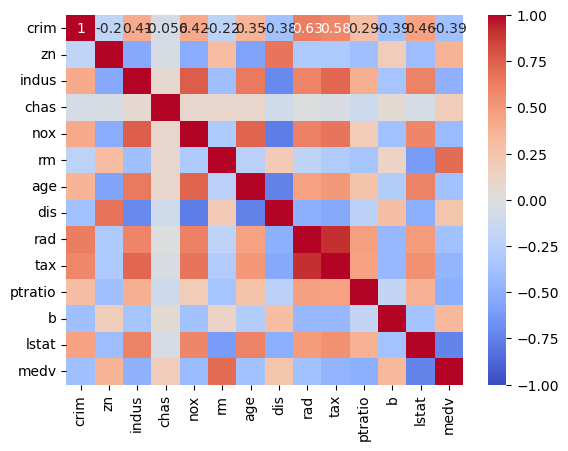

In [37]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)

<font color="green">Ao observarmos a matriz de correlação plotada no formato de heatmap, podemos perceber que a variável que representa o Valor mediano das casas ocupadas pelo proprietário em US $ 1.000 (MEDV) apresenta uma correlação relativamente alta com a variável RM, que representa o número médio de quartos por habitação. Portanto, esta última variável poderá ser decisiva para o nosso modelo prever o MEDV. Também é possível observar uma relação de correlação negativa entre MEDV e LSTAT</font>

### 3. Separe os dados em validação e teste

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)

### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [41]:
tree1 = DecisionTreeRegressor(max_depth=2)
tree2 = DecisionTreeRegressor(max_depth=8)

In [42]:
tree1.fit(X_train, y_train)
tree2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8)

### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [48]:
mse1_train = tree1.score(X_train, y_train)
mse2_train = tree2.score(X_train, y_train)
mse1_test = tree1.score(X_test, y_test)
mse2_test = tree2.score(X_test, y_test)

print(mse1_train)
print(mse2_train)
print(mse1_test)
print(mse2_test)

0.7006254001937753
0.9756812416658032
0.5749272778658491
0.7746606312359767


### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

<font color="green">Para os valores de MSE (Mean Square Error) calculados no item anterior, o menor deles é referente aos dados de teste da árvore com profundidade 2, portanto, é o que me parece mais adequado</font>

### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

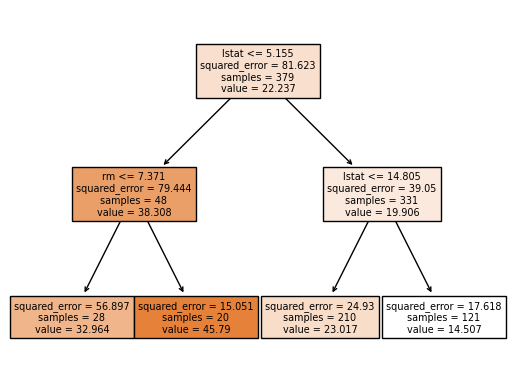

In [50]:
tp = tree.plot_tree(
    tree1,
    feature_names=X.columns,
    filled=True
)

<font color="green">Me parece ser a variável RM, já que é ela que resulta na folha com o menor erro quadrático</font>